In [1]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Mengimpor dataset
dataset = pd.read_csv('Posisi_gaji.csv')
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [3]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

In [4]:
# fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x,y)

d:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_8744\2171039176.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x), max(x), 0.01).reshape(-1,1)


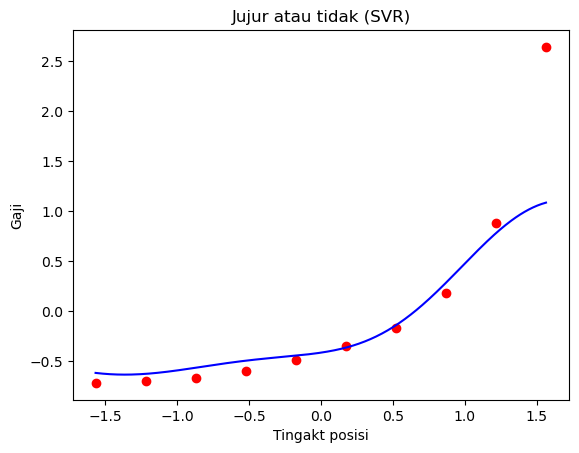

In [10]:
# Visualisasi SVR
x_grid = np.arange(min(x), max(x), 0.01).reshape(-1,1)
plt.scatter(x,y, color='red')
plt.plot(x_grid, regressor.predict(x_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingakt posisi')
plt.ylabel('Gaji')
plt.show()

In [17]:
# prediksi hasil
tingkat_posisi_prediksi = np.array([[6.5]])

tingkat_posisi_prediksi = sc_x.transform(tingkat_posisi_prediksi)

gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)

gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1,1))

In [18]:
#meanmpilkan hasil prediksi
print("Prediksi gaji untuk tingkat posisi 6.5: ", gaji_prediksi[0])

Prediksi gaji untuk tingkat posisi 6.5:  [170370.0204065]


In [19]:
# evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(x)

#menghitung mae
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

#menghitung RMSE
rmse = np.sqrt(mse)

#menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R-squared: ", r2)

MAE:  0.22299274095734414
MSE:  0.24839989293792014
RMSE:  0.4983973243687411
R-squared:  0.7516001070620798
